# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


### Housing Price

The Housing Price Dataset contains property details such as the number of bedrooms, number of bathrooms, and living area size, along with information about property location and sale date. All feature values in the dataset are numeric. This dataset can be used to study housing market trends, identify factors that influence property prices, and develop recommendation systems to help buyers and sellers make informed decisions.
The target feature in this dataset is price, which represents the sale price of each property. All other columns (such as bedrooms, bathrooms, sqft_living, and date) are independent variables or features that may influence the target value. The goal of the analysis is to explore how these features relate to price and identify which ones have the strongest relationship with housing cost.

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as ps

In [4]:
import pandas as pd
df = pd.read_csv('Housing(3).csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Most houses in the dataset have between three and four bedrooms and around two bathrooms, typically arranged on a single floor. Waterfront properties are rare, while the majority of homes lack scenic views.

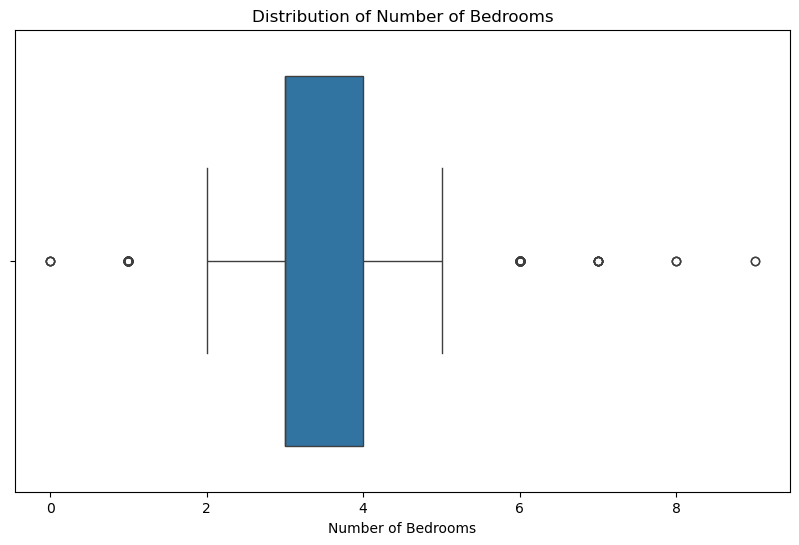

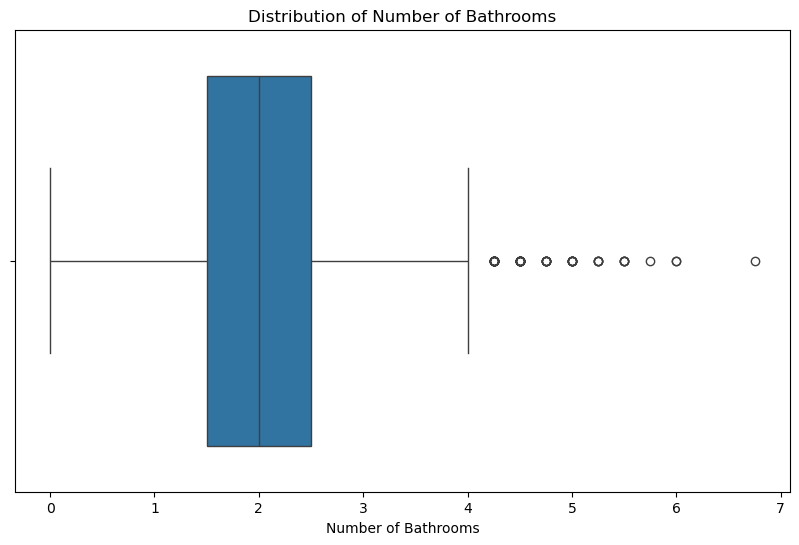

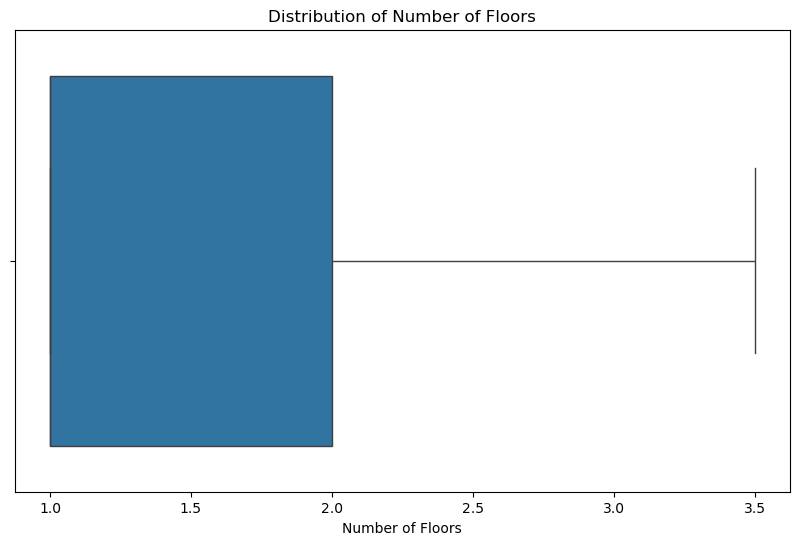

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Quantitative (numeric) features in your dataset
quantitative_features = ['bedrooms', 'bathrooms', 'floors']

# Pretty labels for each feature
feature_titles = {
   'bedrooms': 'Number of Bedrooms',
    'bathrooms': 'Number of Bathrooms',
    'floors': 'Number of Floors',

}

# Create boxplots for each quantitative feature
for feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(f"Distribution of {feature_titles[feature]}")
    plt.xlabel(feature_titles[feature])
    plt.show()


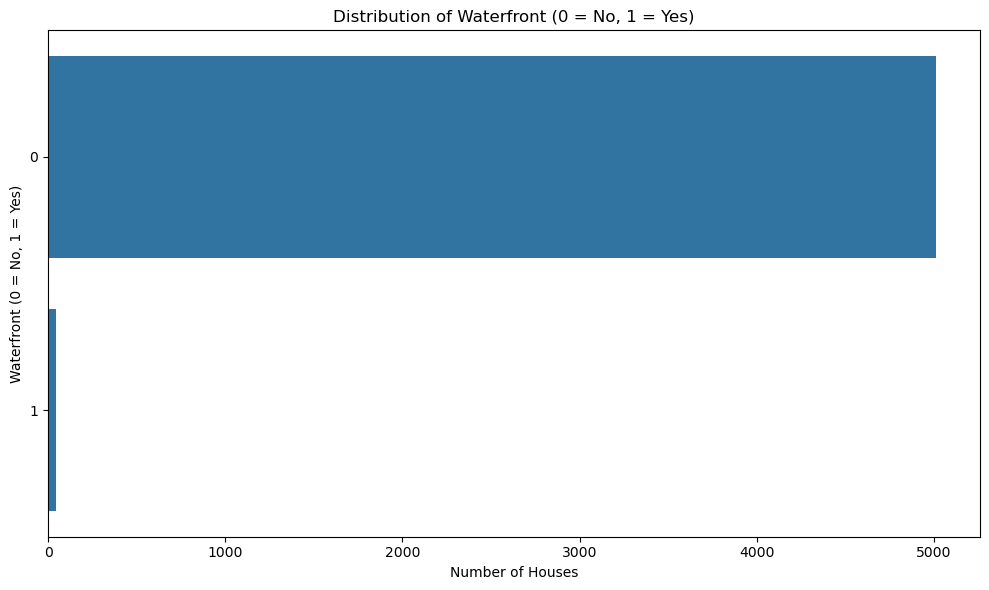

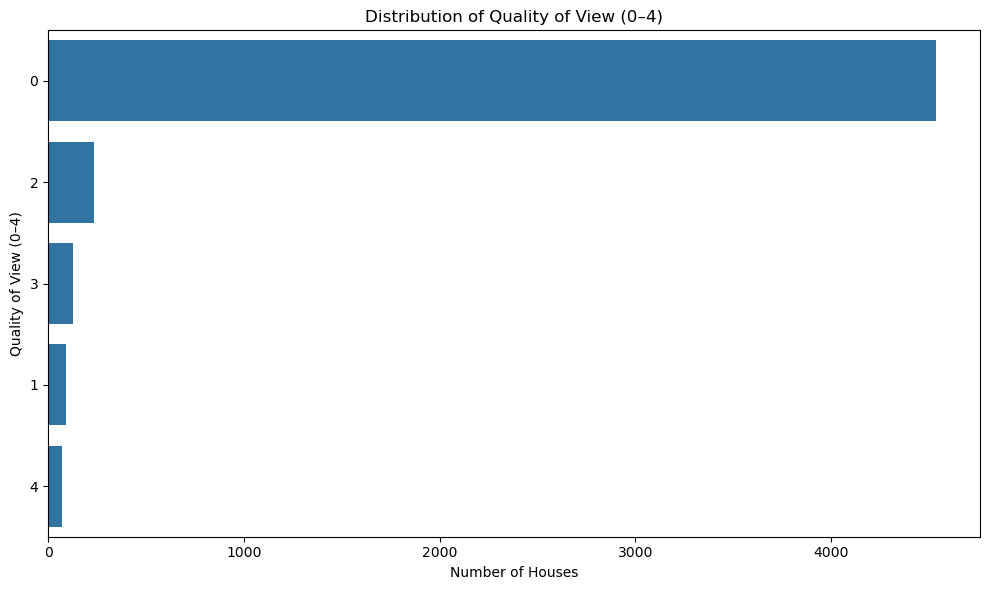

In [11]:
# Bar plots for key categorical variables
categorical_features = ['waterfront', 'view']

feature_titles = {
    'waterfront': 'Waterfront (0 = No, 1 = Yes)',
    'view': 'Quality of View (0–4)'
}

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index)
    plt.title(f"Distribution of {feature_titles[feature]}")
    plt.ylabel(f"{feature_titles[feature]}")
    plt.xlabel("Number of Houses")
    plt.tight_layout()
    plt.show()


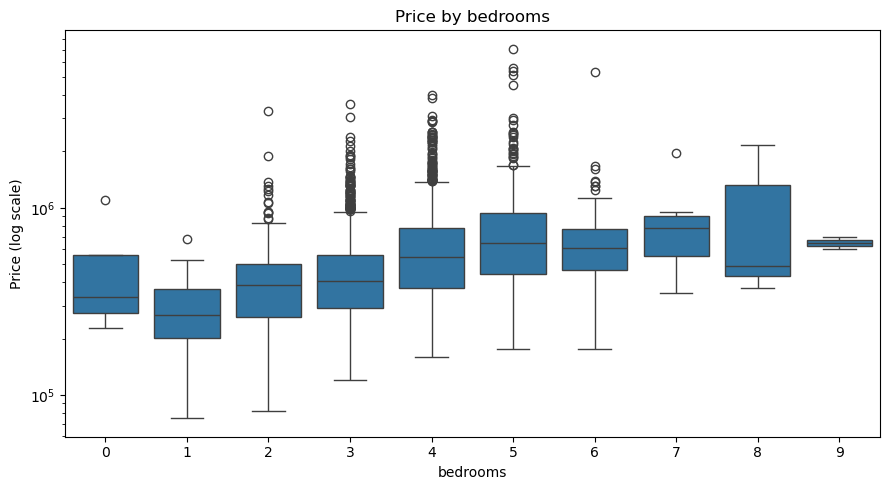

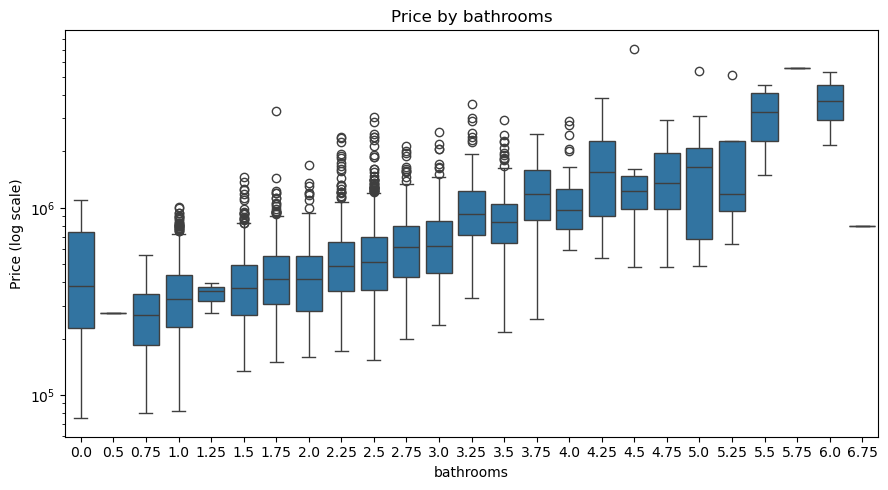

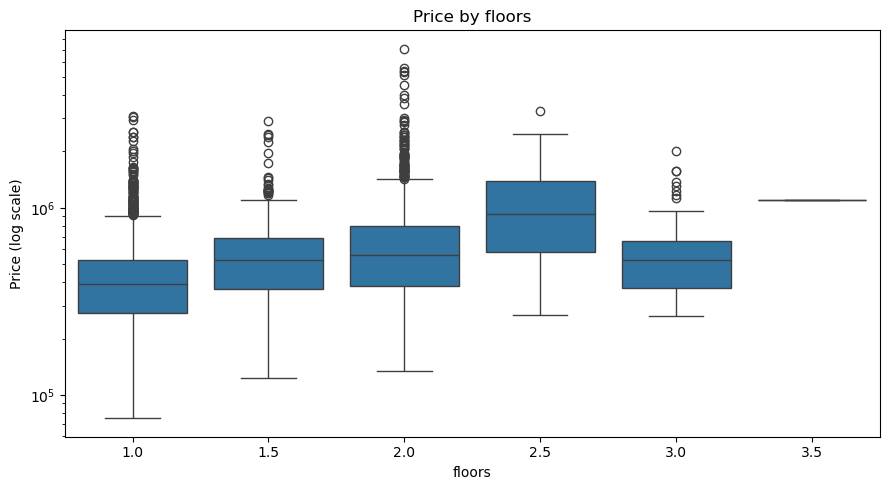

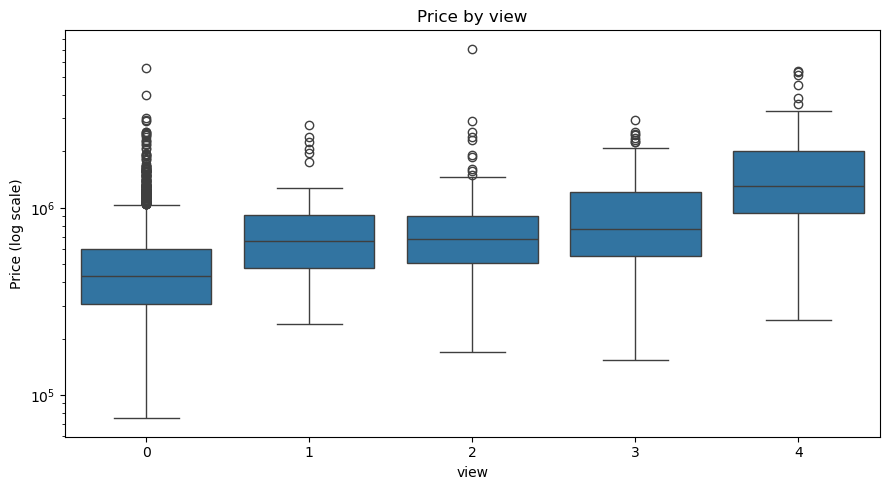

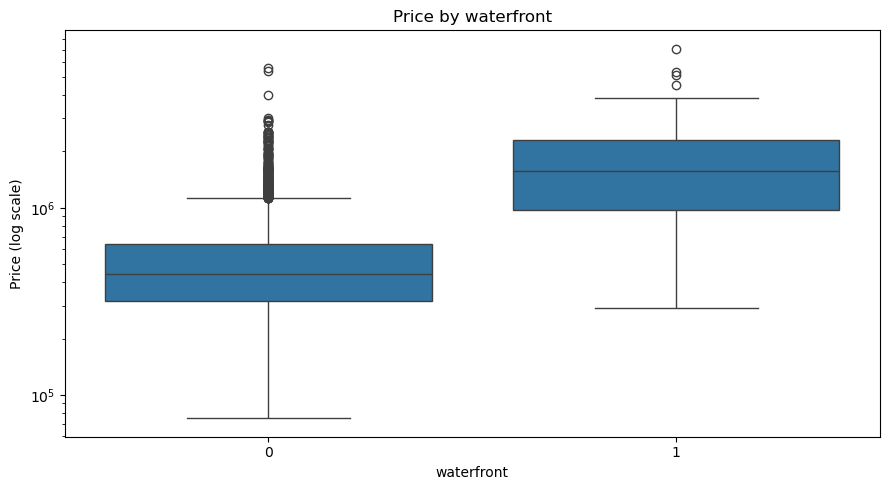

In [13]:
cat_features = ['bedrooms', 'bathrooms', 'floors', 'view', 'waterfront']

for f in cat_features:
    plt.figure(figsize=(9,5))
    ax = sns.boxplot(data=df, x=f, y='price')
    ax.set_yscale('log')  # optional but helpful
    plt.title(f'Price by {f}')
    plt.xlabel(f); plt.ylabel('Price (log scale)')
    plt.tight_layout()
    plt.show()


The visualizations show several clear patterns in how housing features relate to price. Homes with more bedrooms generally cost more, although the trend begins to flatten after about five or six bedrooms, meaning that adding additional rooms does not always increase value. The number of bathrooms has a stronger and more consistent effect, as houses with more bathrooms typically sell for higher prices. The number of floors, however, shows only a weak relationship—most homes have one or two floors. In contrast, both view quality and waterfront access have strong impacts on housing price. Houses with better scenic views show steady increases in price, and properties with waterfront access are significantly more expensive than those without. Overall, these results suggest that location-based and luxury features such as view and waterfront access influence housing prices more than basic structural factors like the number of floors or bedrooms.